In [1]:
import pandas as pd
import matplotlib.pyplot as plt

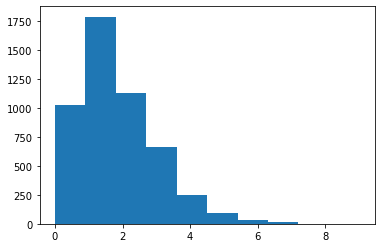

In [2]:
file = pd.read_csv('churn.csv')
plt.hist(file['number_customer_service_calls'], bins=10)
plt.show()

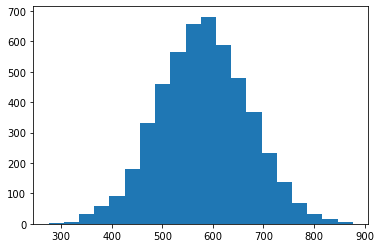

In [4]:
total_minutes = []
for i, j in enumerate(file['total_day_minutes']):
  total_minutes.append(file['total_eve_minutes'][i] + j + file['total_night_minutes'][i])
file['total_minutes'] = total_minutes
plt.hist(total_minutes, bins=20)
plt.show()

In [5]:
x = 0
y = 0
xy = 0
x2 = 0
y2 = 0
for i, j in enumerate(file['number_customer_service_calls']):
  y = y + j
  x = x + total_minutes[i]
  xy = xy + (j*total_minutes[i])
  y2 = y2 + (j*j)
  x2 = x2 + (total_minutes[i]*total_minutes[i])
n = len(file['number_customer_service_calls'])
a = (n*xy) - (x)*(y)
b = ((n*x2 - x2)*(n*y2 - y2)) ** .5
r = a/b
print('correlation is: '+str(r))

correlation is: -0.0010686094516627884


<Figure size 432x288 with 0 Axes>

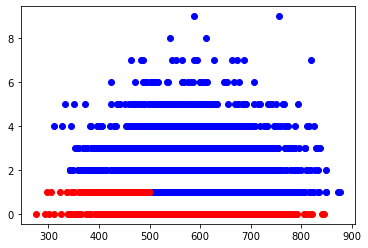

In [8]:
x = []
y = []
x1 = []
y1 = []
for i, j in enumerate(file['number_customer_service_calls']):
  if j*total_minutes[i] < 500:
    x1.append(total_minutes[i])
    y1.append(j)
  else:
    x.append(total_minutes[i])
    y.append(j)
plt.clf()
fig, ax = plt.subplots()
ax.scatter(x, y, color='b')
ax.scatter(x1, y1, color='r')
plt.show()

In [11]:
print(str(file.nlargest(5, 'total_minutes')))
print('\n')
print(str(file.nsmallest(5, 'total_minutes')))

     state  account_length  area_code phone_number international_plan  \
289     OK              89        510     352-6976                 no   
985     NY              64        415     345-9140                yes   
4271    MO             103        415     370-4667                 no   
3205    MS             111        408     345-3787                 no   
4991    AZ              97        510     410-3888                 no   

     voice_mail_plan  number_vmail_messages  total_day_minutes  \
289               no                      0              303.9   
985               no                      0              346.8   
4271             yes                     37              230.7   
3205              no                      0              294.7   
4991              no                      0              252.6   

      total_day_calls  total_day_charge  ...  total_eve_charge  \
289                95             51.66  ...             22.18   
985                55           

In [14]:
print((file['number_customer_service_calls'][0]+total_minutes[0])/(file['number_customer_service_calls'][4999]+total_minutes[4999]))
res = 0
for i, j in enumerate(file['total_day_minutes']):
  if not file['total_day_charge'][i]:
    continue
  res = res+(file['total_day_charge'][i]/j)
print(res/5000)

1.2846000362778889
0.16993525991392774


In [ ]:
file = pd.get_dummies(file)
x = []
x_test = []
#del file['area_code']
for i in range(5000):
  a = []
  for j in file:
    a.append(file[j][i])
  if i < 4000:
    x.append(a)
  else:
    x_test.append(a)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaler.fit(x_test)
x = scaler.transform(x)
y = scaler.transform(x_test)

In [61]:
from sklearn.cluster import DBSCAN

In [ ]:
model = DBSCAN(eps=3, min_samples=5)
for i in range(5):
  model.fit(x)
  print('epoch: '+str(i+1))
print('predictions:: '+str(model.predict(x_test)))

epoch: 0
